In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import re
%matplotlib inline

In [2]:
def process(text):
    text = re.sub(r'[^\x00-\x7F]+', '.', text, 1)
    text = text.encode('ascii', 'ignore').decode('unicode_escape')
    return text

df = pd.read_csv("D:/Machine Learning/Linear Regression/nonlinear_regression.csv", header=0, index_col=0).reset_index()
df['y'] = df['y'].apply(process)
df = df.dropna(how='any')
df['y'] = df['y'].astype(float)
df.shape
df["X"]=df.index
df.head()

,x,y,X
0,1,45.0,0
1,2,60.0,1
2,3,77.0,2
3,4,96.0,3
4,5,117.0,4


In [3]:
df["X"]=df["X"]+1
print(df.head())
df.info

   x      y  X
0  1   45.0  1
1  2   60.0  2
2  3   77.0  3
3  4   96.0  4
4  5  117.0  5


<bound method DataFrame.info of                  x           y        X
0                1   45.000000        1
1                2   60.000000        2
2                3   77.000000        3
3                4   96.000000        4
4                5  117.000000        5
5                6  140.000000        6
6                7  165.000000        7
7                8  192.000000        8
8                9  221.000000        9
9               10  252.000000       10
10              11  285.000000       11
11              12  320.000000       12
12              13  357.000000       13
13              14  396.000000       14
14              15  437.000000       15
15              16  480.000000       16
16              17  525.000000       17
17              18  572.000000       18
18              19  621.000000       19
19              20  672.000000       20
20              21  725.000000       21
21              22  780.000000       22
22              23  837.000000       23
23      

In [4]:
df.drop("x",axis=1,inplace=True)

In [5]:
df.info

<bound method DataFrame.info of                   y        X
0         45.000000        1
1         60.000000        2
2         77.000000        3
3         96.000000        4
4        117.000000        5
5        140.000000        6
6        165.000000        7
7        192.000000        8
8        221.000000        9
9        252.000000       10
10       285.000000       11
11       320.000000       12
12       357.000000       13
13       396.000000       14
14       437.000000       15
15       480.000000       16
16       525.000000       17
17       572.000000       18
18       621.000000       19
19       672.000000       20
20       725.000000       21
21       780.000000       22
22       837.000000       23
23       896.000000       24
24       957.000000       25
25         1.020000       26
26         1.085000       27
27         1.152000       28
28         1.221000       29
29         1.292000       30
...             ...      ...
1048545    1.099461  1048546
1048546    

In [6]:
X=df.iloc[:,1].values.reshape(1,-1)
y=df.iloc[:,0].values.reshape(1,-1)
y

array([[45.        , 60.        , 77.        , ...,  1.09951792,
         1.09952002,  1.09952211]])

In [7]:
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk]

In [8]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[["X"]])
train_y=np.asanyarray(train[["y"]])
regr.fit(train_x,train_y)

print("Coefficient: ",regr.coef_)
print("Intercept: ",regr.intercept_)

Coefficient:  [[0.00072707]]
Intercept:  [-52.86715756]


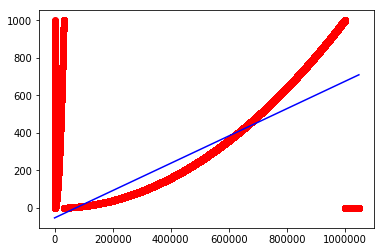

In [9]:
plt.scatter(train["X"],train["y"],color='red')
plt.plot(train_x, regr.predict(train_x),'-b')

In [10]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[["X"]])
test_y=np.asanyarray(test[["y"]])

y_pred=regr.predict(test_x)

print("R2_score:%.2f" %r2_score(test_y,y_pred))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred- test_y)))

R2_score:0.54
Mean absolute error: 121.09
